In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
from bayesmf.models.nmf import VanillaNMF, ConsensusNMF
from bayesmf.models.bmf import BayesMF, OnlineBayesMF
from bayesmf.scripts.utils import workhorse, run_kfold_xval

%reload_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

In [4]:
home_path = '/home/sxchao/crc_atlas/c222/colon10x_c222_subClean/'
#in_path = home_path + 'colon10x_c222_normTPM_112319.h5ad'
in_path = home_path + 'colon10x_c222_rawCount_042320.h5ad'
adata = sc.read_h5ad(in_path)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
clusters = adata.obs['clFullc222'].unique()
clusters_t = [x for x in clusters if x[0]=='T']
adata_t = adata[adata.obs['clFullc222'].isin(clusters_t),:]

In [6]:
cd8 = np.asarray(adata_t[:,['CD8A','CD8B']].X.todense())
cd8 = cd8.sum(axis=1) > 0
tcells = np.asarray(adata_t[cd8, :].X.todense())

In [7]:
cells = np.count_nonzero(tcells, axis=1)
cells.shape

(16852,)

In [8]:
genes = np.count_nonzero(tcells, axis=0)
genes.shape

(43078,)

(array([8.083e+03, 6.308e+03, 1.493e+03, 5.490e+02, 2.450e+02, 9.400e+01,
        4.200e+01, 2.400e+01, 9.000e+00, 5.000e+00]),
 array([ 236. ,  872.3, 1508.6, 2144.9, 2781.2, 3417.5, 4053.8, 4690.1,
        5326.4, 5962.7, 6599. ]),
 <a list of 10 Patch objects>)

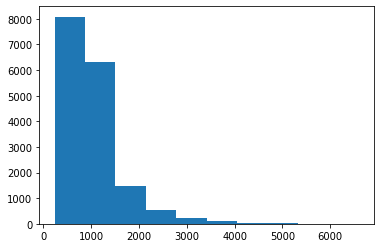

In [29]:
plt.hist(cells)

(array([4.0317e+04, 1.5040e+03, 5.2500e+02, 2.6400e+02, 1.5400e+02,
        9.0000e+01, 5.0000e+01, 3.8000e+01, 2.8000e+01, 1.0800e+02]),
 array([    0.,  1685.,  3370.,  5055.,  6740.,  8425., 10110., 11795.,
        13480., 15165., 16850.]),
 <a list of 10 Patch objects>)

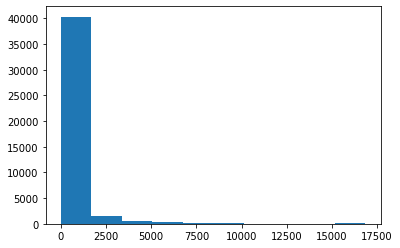

In [30]:
plt.hist(genes)

In [11]:
np.sum(genes > 7500), np.sum(cells > 2000)

(385, 1171)

In [12]:
ktcells = tcells[cells > 2000, :]
ktcells = ktcells[:, genes > 7500]
ktcells.shape

(1171, 385)

In [13]:
# sparsity
1 - (np.count_nonzero(ktcells) / ktcells.size)

0.04627191766389038

In [14]:
ktcells[:5,:5]

array([[52.,  8.,  4.,  3.,  1.],
       [ 0.,  9.,  2.,  5.,  1.],
       [39., 35., 12., 17., 15.],
       [ 7., 11., 10.,  9.,  4.],
       [ 5., 11.,  2.,  6.,  2.]], dtype=float32)

In [15]:
X = ktcells[:-1,:].T
errs, durs = run_kfold_xval(X)

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


In [16]:
errs

{5: {'vanilla': [8.513729634431549,
   8.058201293281698,
   7.814426135808831,
   8.20148534259155,
   8.370446525327283],
  'consensus': [8.513729634431549,
   8.058201293281698,
   7.81442613580883,
   8.20148534259155,
   8.370446525327285],
  'batch': [19.455883090731092,
   19.188979925294948,
   18.39407061865612,
   19.726335959198785,
   18.412382734386505],
  'stochastic': [18.95039382141941,
   18.774547751391008,
   17.719905470377103,
   18.58878998171735,
   17.700486440317825]},
 10: {'vanilla': [6.920450667771555,
   6.578455530233085,
   6.293241513030171,
   6.492882113369556,
   6.640490452874349],
  'consensus': [6.920450667771556,
   6.578455530233085,
   6.29324151303017,
   6.492882113369556,
   6.640490452874349],
  'batch': [19.41390627832119,
   19.13067788925658,
   18.340282804747712,
   19.67659539139587,
   18.352221846295517],
  'stochastic': [13.266000071002672,
   13.09302682394237,
   12.166114307270899,
   13.750841297610984,
   12.440076976446505]},


In [19]:
errs1b

{5: {'vanilla': [8.513729634431549,
   8.058201293281698,
   7.814426135808831,
   8.20148534259155,
   8.370446525327283],
  'consensus': [8.513729634431549,
   8.058201293281698,
   7.81442613580883,
   8.20148534259155,
   8.370446525327285],
  'batch': [19.455883090731092,
   19.188979925294948,
   18.39407061865612,
   19.726335959198785,
   18.412382734386505],
  'stochastic': [18.95039382141941,
   18.774547751391008,
   17.719905470377103,
   18.58878998171735,
   17.700486440317825]},
 10: {'vanilla': [6.920450667771555,
   6.578455530233085,
   6.293241513030171,
   6.492882113369556,
   6.640490452874349],
  'consensus': [6.920450667771556,
   6.578455530233085,
   6.29324151303017,
   6.492882113369556,
   6.640490452874349],
  'batch': [19.41390627832119,
   19.13067788925658,
   18.340282804747712,
   19.67659539139587,
   18.352221846295517],
  'stochastic': [13.266000071002672,
   13.09302682394237,
   12.166114307270899,
   13.750841297610984,
   12.440076976446505]},


In [20]:
import pickle
pickle.dump(errs1b, open('/home/sxchao/bayesmf/output/errsDown_rawCount_01b.pkl', 'wb'))
pickle.dump(durs1b, open('/home/sxchao/bayesmf/output/dursDown_rawCount_01b.pkl', 'wb'))

In [18]:
errs1b, durs1b = run_kfold_xval(X)

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


In [42]:
errs2, durs2 = run_kfold_xval(X, kfold=10)

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered i

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered i

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered i

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered i

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered i

In [45]:
errs3, durs3 = run_kfold_xval(X, random_state=None)

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


In [51]:
errs4, durs4 = run_kfold_xval(X, components = [30, 35, 40, 45, 50])

/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  
/home/sxchao/bayesmf/models/bmf.py:97: RuntimeWarning: invalid value encountered in double_scalars
  


In [43]:
errs

{5: {'vanilla': [0.7309537159693774,
   0.7411502899902755,
   0.7328949602946455,
   0.7334042666593619,
   0.7299659001805062],
  'consensus': [0.7309537159693774,
   0.7411502899902755,
   0.7328949602946455,
   0.733404266659362,
   0.7299659001805062],
  'batch': [0.8362123015094405,
   0.8592654599826401,
   0.8486113090505223,
   0.846106738904791,
   0.8508008677190954],
  'stochastic': [0.8355813101716559,
   0.8590086813627745,
   0.8485315487985988,
   0.8459601266431799,
   0.8511634052403358]},
 10: {'vanilla': [0.6955554629756736,
   0.7058740574883813,
   0.699015870356152,
   0.697361695370032,
   0.6931979138295534],
  'consensus': [0.6955554629756736,
   0.7058740574883813,
   0.699015870356152,
   0.697361695370032,
   0.6931979138295535],
  'batch': [0.8351482064424729,
   0.8587541130149287,
   0.8479783991861253,
   0.8456186114680582,
   0.8498098550238077],
  'stochastic': [0.8349980315939528,
   0.8585486270806878,
   0.848178481744079,
   0.8455235232443227,
 

In [48]:
errs1b # reproducible! what about stochastic?

{5: {'vanilla': [0.7309537159693774,
   0.7411502899902755,
   0.7328949602946455,
   0.7334042666593619,
   0.7299659001805062],
  'consensus': [0.7309537159693774,
   0.7411502899902755,
   0.7328949602946455,
   0.733404266659362,
   0.7299659001805062],
  'batch': [0.8362123015094405,
   0.8592654599826401,
   0.8486113090505223,
   0.846106738904791,
   0.8508008677190954],
  'stochastic': [0.8355759326441797,
   0.8590226724596725,
   0.8485920219026037,
   0.8460868649546225,
   0.8510502500464865]},
 10: {'vanilla': [0.6955554629756736,
   0.7058740574883813,
   0.699015870356152,
   0.697361695370032,
   0.6931979138295534],
  'consensus': [0.6955554629756736,
   0.7058740574883813,
   0.699015870356152,
   0.697361695370032,
   0.6931979138295535],
  'batch': [0.8351482064424729,
   0.8587541130149287,
   0.8479783991861253,
   0.8456186114680582,
   0.8498098550238077],
  'stochastic': [0.8351391265540621,
   0.8586581157738529,
   0.8482671508063411,
   0.8456566490584327,


In [49]:
errs2 # 10-fold not much better (0.845 vs 0.846)

{5: {'vanilla': [0.7421099900332405,
   0.7188576011426523,
   0.7379243689327588,
   0.7435481981537787,
   0.737870594495107,
   0.7270873814417245,
   0.7288183159973914,
   0.737869300786264,
   0.735858886166313,
   0.7221513590345314],
  'consensus': [0.7421099900332405,
   0.7188576011426523,
   0.7379243689327588,
   0.7435481981537787,
   0.7378705944951071,
   0.7270873814417245,
   0.7288183159973914,
   0.7378693007862639,
   0.735858886166313,
   0.7221513590345314],
  'batch': [0.846975210384389,
   0.8246839226421258,
   0.8638157783458038,
   0.8549645394133554,
   0.8516748077872279,
   0.8458879919153788,
   0.8364315602306459,
   0.8555026524695003,
   0.8456628836704905,
   0.8549289995160062],
  'stochastic': [0.8467258853599842,
   0.825047330430749,
   0.8632503969804582,
   0.8544746804965541,
   0.8516596057030322,
   0.8453500328152531,
   0.8366215640568693,
   0.8556695516900804,
   0.8460795349686109,
   0.8550968711184854]},
 10: {'vanilla': [0.70604714724

In [46]:
errs3 # randomizing no diff (0.846)

{5: {'vanilla': [0.7286927795491629,
   0.742868886734532,
   0.7333038630747885,
   0.7275289507200621,
   0.7336983791099233],
  'consensus': [0.7286927795491629,
   0.742868886734532,
   0.7333038630747885,
   0.7275289507200621,
   0.7336983791099233],
  'batch': [0.8410375341212287,
   0.8605262053048189,
   0.8439608059926396,
   0.8439293530470152,
   0.8511415563684755],
  'stochastic': [0.840923560149267,
   0.8605229845533225,
   0.8436635488474925,
   0.8431394172953056,
   0.8510542143061186]},
 10: {'vanilla': [0.6945549325876011,
   0.705994980614963,
   0.6965534072717715,
   0.6938646994955234,
   0.6981413074624602],
  'consensus': [0.6945549325876011,
   0.705994980614963,
   0.6965534072717715,
   0.6938646994955235,
   0.6981413074624602],
  'batch': [0.8401899138408566,
   0.859984889212223,
   0.8431413404484958,
   0.8431140494354844,
   0.850434510569595],
  'stochastic': [0.8406307327459109,
   0.8599023325005396,
   0.8434803352699355,
   0.8437687069314493,
 

In [52]:
errs4 # inc k doesn't seem to help w/ bmf

{30: {'vanilla': [0.6366519075077789,
   0.6469961679513248,
   0.6397357183988329,
   0.6408071302599684,
   0.6348853859166967],
  'consensus': [0.6366519075077789,
   0.6469961679513248,
   0.6397357183988329,
   0.6408071302599684,
   0.6348853859166967],
  'batch': [0.8346194426503732,
   0.8582198740866334,
   0.8475194133948708,
   0.844950450639336,
   0.8493209129752428],
  'stochastic': [0.8347138513044767,
   0.8577249965020468,
   0.8476290837166367,
   0.8450254554731773,
   0.8494315172207898]},
 35: {'vanilla': [0.6287629429896658,
   0.6385611762318305,
   0.6315361097089225,
   0.6329959540070111,
   0.6256981450034129],
  'consensus': [0.6287629429896658,
   0.6385611762318305,
   0.6315361097089225,
   0.6329959540070111,
   0.625698145003413],
  'batch': [0.8346608045556917,
   0.8581137040684401,
   0.8474415606796238,
   0.8449422292776544,
   0.84940885713054],
  'stochastic': [0.8350422527277681,
   0.8587181884355409,
   0.8473843686065505,
   0.845293674720505

In [ ]:
#errs = pickle.load(open('gdrive/My Drive/Colab Notebooks/errs_01.pkl', 'rb'))
#durs = pickle.load(open('gdrive/My Drive/Colab Notebooks/durs_01.pkl', 'rb'))